### INFO

Independent Investigator: Yunbo Ni

E-mail: yni33@wisc.edu

Project Name: *Research on Soaring Home Value in U.S. with Regional Locality Analysis*

In [155]:
# Pakcage Imports
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt  
import seaborn as sns
import statsmodels.api as sm
import geopandas 

In [156]:
# Data Imports & Cleaning
# monthly All Homes Including Single-Family Residences, Condos, and CO-OPs in the United States of America
home = pd.read_csv('USAUCSFRCONDOSMSAMID.csv', parse_dates=['DATE'], index_col='DATE')
home = home.rename(columns = {'USAUCSFRCONDOSMSAMID_PCH':'home_value_growth_rate'})

# monthly 30-Year Fixed Rate Mortgage Average in the United States
mort_30 = pd.read_csv('MORTGAGE30US.csv', parse_dates=['DATE'], index_col='DATE')
mort_30 = mort_30.rename(columns = {'MORTGAGE30US':'30_year_mortgage'})

# monthly 15-Year Fixed Rate Mortgage Average in the United States
mort_15 = pd.read_csv('MORTGAGE15US.csv', parse_dates=['DATE'], index_col='DATE')
mort_15 = mort_15.rename(columns = {'MORTGAGE15US':'15_year_mortgage'})

# monthly real disposable personal income
inc = pd.read_csv('DSPIC96.csv', parse_dates=['DATE'], index_col='DATE')
inc = inc.rename(columns = {'DSPIC96':'real_disposable_income'})

# monthly Unemployment Rate
ue = pd.read_csv('UNRATE.csv', parse_dates=['DATE'], index_col='DATE')
ue = ue.rename(columns = {'UNRATE':'unemployment_rate'})

# daily covid cases
covid = pd.read_csv('covid.csv', parse_dates=['date'], index_col='date')

In [157]:
# covid transform
covid = covid.resample('MS').sum()
covid['covid_growth_rate'] = covid['cases'].pct_change()


# Section 1 Linear Correlation
## Section 1.1 Plotting
### Section 1.1.1 General Plotting

In [158]:
# Option 1 - Masks General
maskh = (home.index >= '2020-01-01') & (home.index <= '2022-02-01')
mask0 = (mort_30.index >= '2020-01-01') & (mort_30.index <= '2022-02-01')
mask1 = (mort_15.index >= '2020-01-01') & (mort_15.index <= '2022-02-01')
mask2 = (inc.index >= '2020-01-01') & (inc.index <= '2022-02-01')

mask3 = (ue.index >= '2020-01-01') & (ue.index <= '2022-02-01')
mask4 = (covid.index >= '2020-01-01') & (covid.index <= '2022-02-01')
home_1 = home.loc[maskh]
mort_30_1 = mort_30.loc[mask0]
mort_15_1 = mort_15.loc[mask1]
inc_1 = inc.loc[mask2]
ue_1 = ue.loc[mask3]
covid_1 = covid.loc[mask4]

In [159]:
# Option 2 - Masks Covid Related
cmaskh = (home.index >= '2020-05-01') & (home.index <= '2022-02-01')
cmask0 = (mort_30.index >= '2020-05-01') & (mort_30.index <= '2022-02-01')
cmask1 = (mort_15.index >= '2020-05-01') & (mort_15.index <= '2022-02-01')
cmask2 = (inc.index >= '2020-05-01') & (inc.index <= '2022-02-01')
cmask3 = (ue.index >= '2020-05-01') & (ue.index <= '2022-02-01')
cmask4 = (covid.index >= '2020-05-01') & (covid.index <= '2022-02-01')
home_c = home.loc[cmaskh]
mort_30_c = mort_30.loc[cmask0]
mort_15_c = mort_15.loc[cmask1]
inc_c = inc.loc[cmask2]
ue_c = ue.loc[cmask3]
covid_c = covid.loc[cmask4]


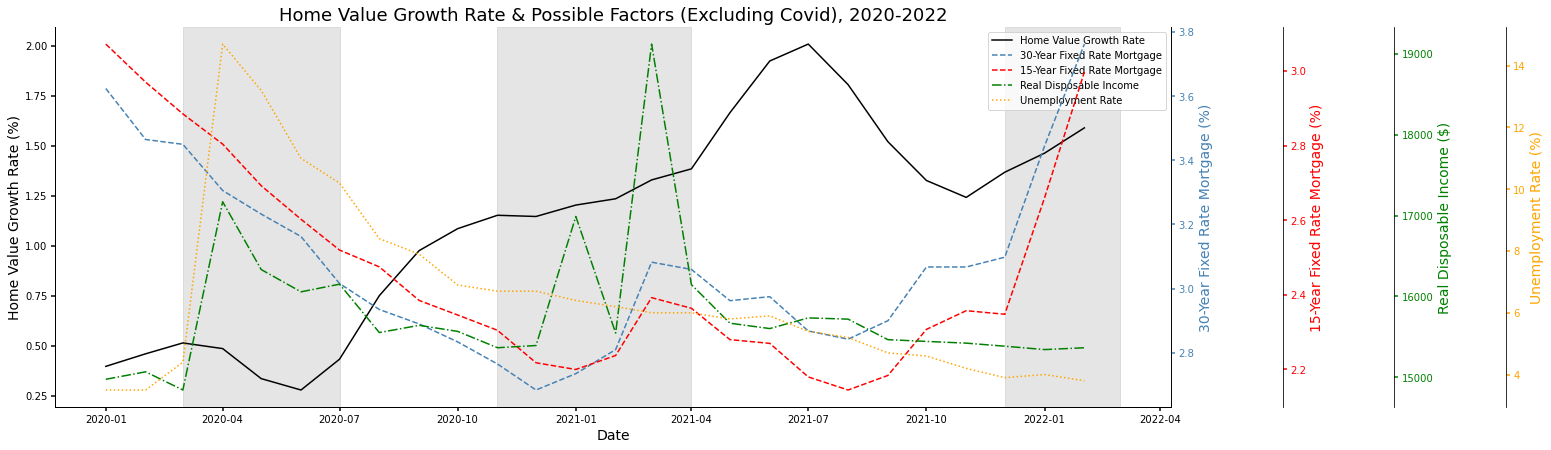

In [160]:
# Plotting all research variables 
fig, ax = plt.subplots(figsize=(20,7))

twin1 = ax.twinx()
twin2 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3 = ax.twinx()
twin3.spines.right.set_position(("axes", 1.2))
twin4 = ax.twinx()
twin4.spines.right.set_position(("axes", 1.3))

p1, =ax.plot(home_1.index,home_1['home_value_growth_rate'], ls='-', color='black', label='Home Value Growth Rate') 
p2, =twin1.plot(mort_30_1.index, mort_30_1['30_year_mortgage'], ls='--', color='steelblue', label='30-Year Fixed Rate Mortgage') 
p3, =twin2.plot(mort_15_1.index, mort_15_1['15_year_mortgage'], ls='--', color='red', label='15-Year Fixed Rate Mortgage') 
p4, =twin3.plot(inc_1.index, inc_1['real_disposable_income'], color='green',ls='-.', label='Real Disposable Income') 
p5, =twin4.plot(ue_1.index, ue_1['unemployment_rate'], color='orange', ls=':', label='Unemployment Rate') 

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
twin4.yaxis.label.set_color(p5.get_color())

ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Home Value Growth Rate (%)", fontsize=14)
twin1.set_ylabel("30-Year Fixed Rate Mortgage (%)", fontsize=14)
twin2.set_ylabel("15-Year Fixed Rate Mortgage (%)", fontsize=14)
twin3.set_ylabel("Real Disposable Income ($)", fontsize=14)
twin4.set_ylabel("Unemployment Rate (%)", fontsize=14)


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)
twin4.tick_params(axis='y', colors=p5.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.axvspan(dt.datetime(2020,3,1),dt.datetime(2020,7,1), color = 'grey', alpha = 0.2 )
ax.axvspan(dt.datetime(2020,11,1),dt.datetime(2021,4,1), color = 'grey', alpha = 0.2 )
ax.axvspan(dt.datetime(2021,12,1),dt.datetime(2022,3,1), color = 'grey', alpha = 0.2 )

ax.set_title('Home Value Growth Rate & Possible Factors (Excluding Covid), 2020-2022', fontsize=18)
ax.legend(handles=[p1, p2, p3, p4, p5], loc ='upper right')
ax.spines['top'].set_visible(False)
twin1.spines['top'].set_visible(False)
twin2.spines['top'].set_visible(False)
twin3.spines['top'].set_visible(False)
twin4.spines['top'].set_visible(False)

plt.savefig('1.1.1-General.svg')
plt.show()

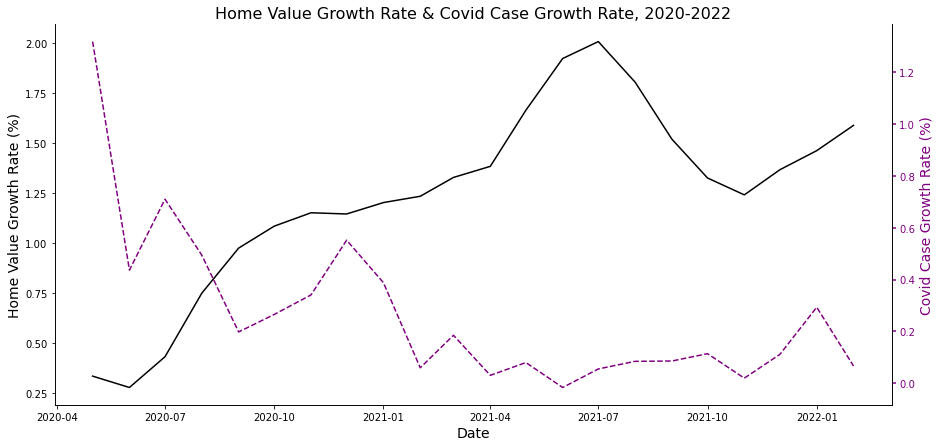

In [161]:
# Plotting Covid
fig, ax = plt.subplots(figsize=(15,7))
twin1 = ax.twinx()

p1, = ax.plot(home_c.index, home_c['home_value_growth_rate'], color='black', ls='-', label='Home Value Growth Rate')
p2, = twin1.plot(covid_c.index, covid_c['covid_growth_rate'], color='purple', ls='--', label='Covid Case Growth Rate')  

ax.set_title('Home Value Growth Rate & Covid Case Growth Rate, 2020-2022', fontsize=16)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Home Value Growth Rate (%)", fontsize=14)
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin1.set_ylabel("Covid Case Growth Rate (%)", fontsize=14)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)

ax.spines['top'].set_visible(False)
twin1.spines['top'].set_visible(False)

plt.savefig('1.1.2-2.svg')
plt.show()

### Section 1.1.2 Primary Research Variables

In [162]:
maskh = (home.index >= '2020-01-01') & (home.index <= '2022-02-01')
mask0 = (mort_30.index >= '2020-01-01') & (mort_30.index <= '2022-02-01')
mask1 = (mort_15.index >= '2020-01-01') & (mort_15.index <= '2022-02-01')

home_plot = home.loc[maskh]
mort_30_plot = mort_30.loc[mask0]
mort_15_plot = mort_15.loc[mask1]

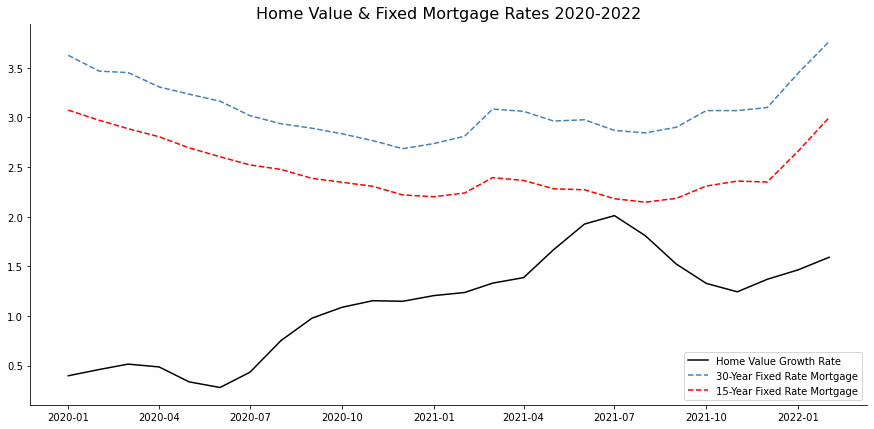

In [163]:
# Plotting all mortgage rates (Line Plot)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(home_1.index, home_1['home_value_growth_rate'], color='black', ls='-', label='Home Value Growth Rate') 
ax.plot(mort_30_1.index, mort_30_1['30_year_mortgage'], color='steelblue', ls='--', label='30-Year Fixed Rate Mortgage')  
ax.plot(mort_15_1.index, mort_15_1['15_year_mortgage'], color='red', ls='--', label='15-Year Fixed Rate Mortgage')  

ax.set_title('Home Value & Fixed Mortgage Rates 2020-2022', fontsize=16)

sns.despine(ax=ax)
plt.legend(loc='best')
plt.savefig('1.1.2-1.svg')
plt.show()

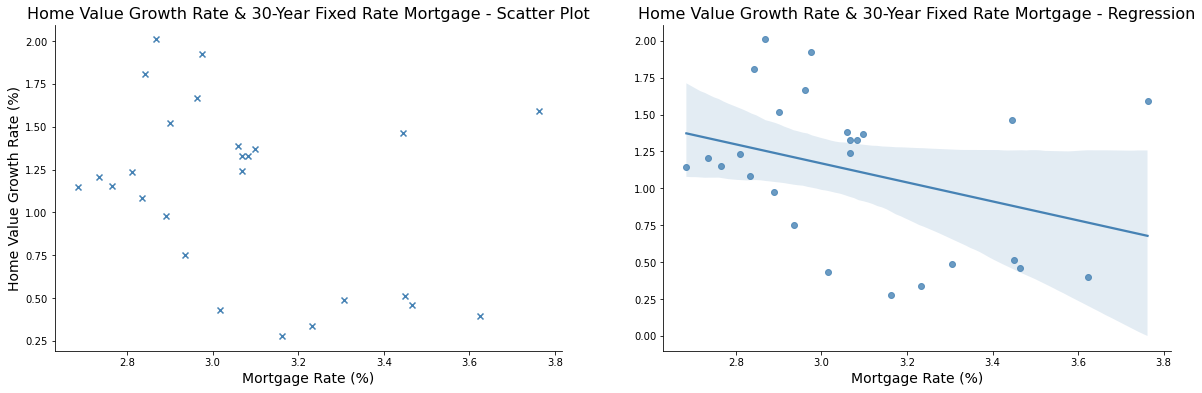

In [164]:
# scatterplot & regplot with 30-Year Mortage
fig, axes = plt.subplots(1, 2,figsize=(20,6))
# scatterplot
axes[0].scatter( mort_30_1['30_year_mortgage'], home_1['home_value_growth_rate'], color='steelblue', marker='x')
axes[0].set_title('Home Value Growth Rate & 30-Year Fixed Rate Mortgage - Scatter Plot', fontsize=16)
axes[0].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[0].set_xlabel('Mortgage Rate (%)', fontsize=14)
# regplot
axes[1] = sns.regplot(y = home_1['home_value_growth_rate'], x = mort_30_1['30_year_mortgage'], color='steelblue', ax=axes[1])
axes[1].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[1].set_xlabel('Mortgage Rate (%)', fontsize=14)
axes[1].set_title('Home Value Growth Rate & 30-Year Fixed Rate Mortgage - Regression', fontsize=16)
axes[1].set(ylabel=None)

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])
plt.savefig('1.1.2-2.svg')
plt.show()

### Section 1.1.3 Seconday Research Variables

### 1.1.3.1 Real Disposable Income

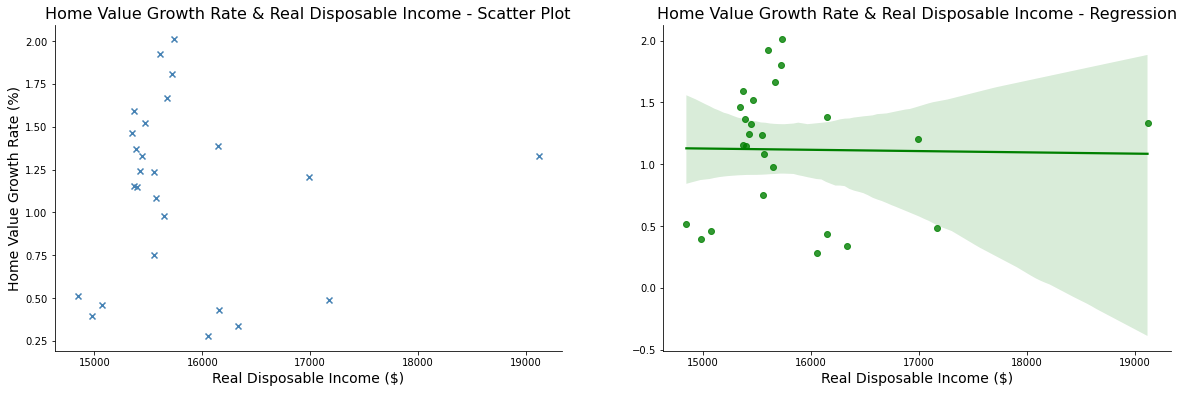

In [165]:
### 1.1.3.1 Real Disposable Income# scatterplot & regplot with Real Disposable Income 
fig, axes = plt.subplots(1, 2,figsize=(20,6))
# scatterplot
axes[0].scatter( inc_1['real_disposable_income'], home_1['home_value_growth_rate'], color='steelblue', marker='x')
axes[0].set_title('Home Value Growth Rate & Real Disposable Income - Scatter Plot', fontsize=16)
axes[0].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[0].set_xlabel('Real Disposable Income ($)', fontsize=14)
# regplot
axes[1] = sns.regplot(y = home_1['home_value_growth_rate'], x = inc_1['real_disposable_income'], color='green', ax=axes[1])
axes[1].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[1].set_xlabel('Real Disposable Income ($)', fontsize=14)
axes[1].set_title('Home Value Growth Rate & Real Disposable Income - Regression', fontsize=16)
axes[1].set(ylabel=None)

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])
plt.savefig('1.1.3-1.svg')
plt.show()

### 1.1.3.1 Real Disposable Income (Reference)

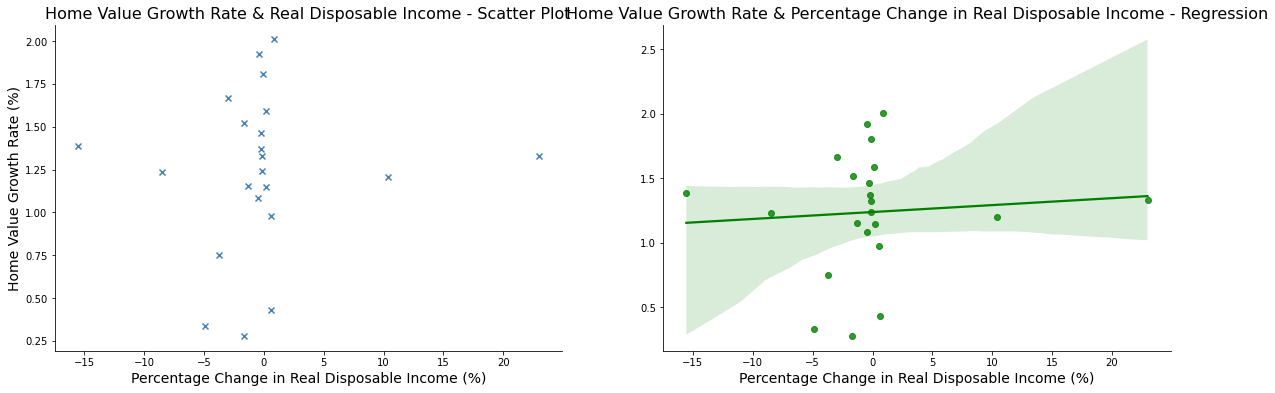

In [166]:
# scatterplot & regplot with Percentage Change in Real Disposable Income 
fig, axes = plt.subplots(1, 2,figsize=(20,6))
# scatterplot
axes[0].scatter( incp_1['DSPIC96_PCH'], home_1.loc['2020-05-01':]['home_value_growth_rate'], color='steelblue', marker='x')
axes[0].set_title('Home Value Growth Rate & Real Disposable Income - Scatter Plot', fontsize=16)
axes[0].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[0].set_xlabel('Percentage Change in Real Disposable Income (%)', fontsize=14)
# regplot
axes[1] = sns.regplot(y = home_1.loc['2020-05-01':]['home_value_growth_rate'], x = incp_1['DSPIC96_PCH'], color='green', ax=axes[1])
axes[1].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[1].set_xlabel('Percentage Change in Real Disposable Income (%)', fontsize=14)
axes[1].set_title('Home Value Growth Rate & Percentage Change in Real Disposable Income - Regression', fontsize=16)
axes[1].set(ylabel=None)

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])
plt.savefig('1.1.3-1p.svg')
plt.show()

### 1.1.3.2 Unemployment Rate

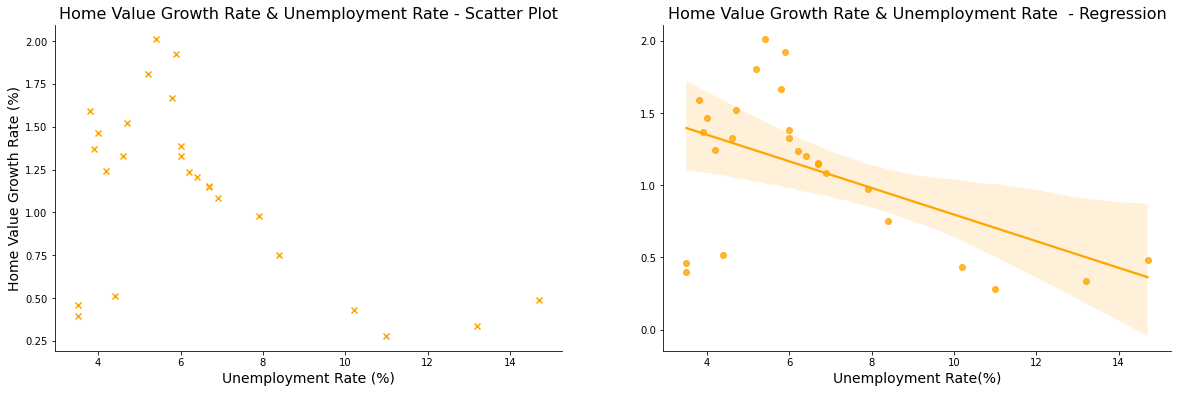

In [167]:
# scatterplot & regplot with 30-Year Mortage
fig, axes = plt.subplots(1, 2,figsize=(20,6))
# scatterplot
axes[0].scatter( ue_1['unemployment_rate'], home_1['home_value_growth_rate'], color='orange', marker='x')
axes[0].set_title('Home Value Growth Rate & Unemployment Rate - Scatter Plot', fontsize=16)
axes[0].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[0].set_xlabel('Unemployment Rate (%)', fontsize=14)
# regplot
axes[1] = sns.regplot(y = home_1['home_value_growth_rate'], x = ue_1['unemployment_rate'], color='orange', ax=axes[1])
axes[1].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[1].set_xlabel('Unemployment Rate(%)', fontsize=14)
axes[1].set_title('Home Value Growth Rate & Unemployment Rate  - Regression', fontsize=16)
axes[1].set(ylabel=None)

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])
plt.savefig('1.1.3-2.svg')
plt.show()

### 1.1.3.3 Covid Rate

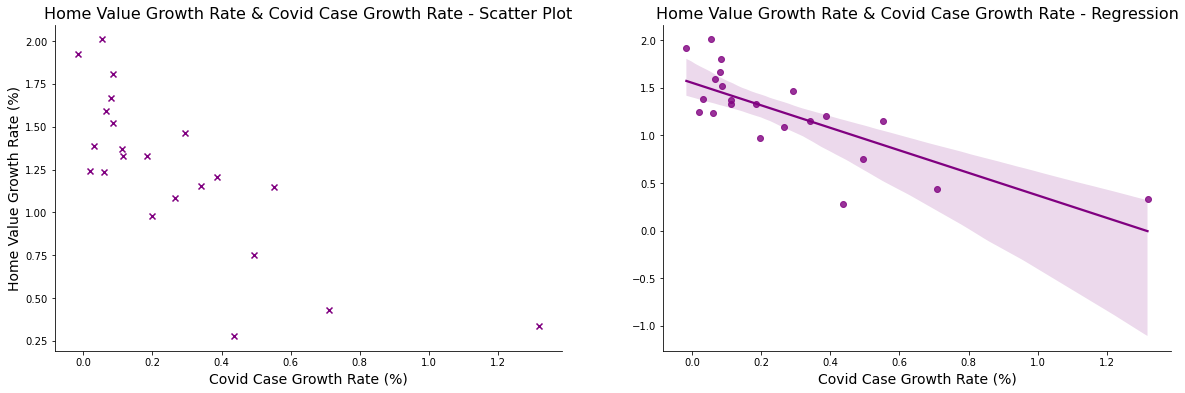

In [168]:
# scatterplot & regplot with 30-Year Mortage
fig, axes = plt.subplots(1, 2,figsize=(20,6))
# scatterplot
axes[0].scatter( covid_c['covid_growth_rate'], home_c['home_value_growth_rate'], color='purple', marker='x')
axes[0].set_title('Home Value Growth Rate & Covid Case Growth Rate - Scatter Plot', fontsize=16)
axes[0].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[0].set_xlabel('Covid Case Growth Rate (%)', fontsize=14)
# regplot
axes[1] = sns.regplot(y = home_c['home_value_growth_rate'], x = covid_c['covid_growth_rate'], color='purple', ax=axes[1])
axes[1].set_ylabel('Home Value Growth Rate (%)', fontsize=14)
axes[1].set_xlabel('Covid Case Growth Rate (%)', fontsize=14)
axes[1].set_title('Home Value Growth Rate & Covid Case Growth Rate - Regression', fontsize=16)
axes[1].set(ylabel=None)

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])
plt.savefig('1.1.3-3.svg')
plt.show()

### Section 1.2 OLS Analysis

### Section 1.2.1 Fixed Mortgage Rate

In [169]:
x =  mort_30_1['30_year_mortgage']
y =  home_1['home_value_growth_rate']

model = sm.OLS(y, x).fit()
model.summary()
#can't save to svg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     home_value_growth_rate   R-squared (uncentered):                   0.800
Model:                                OLS   Adj. R-squared (uncentered):              0.792
Method:                     Least Squares   F-statistic:                              100.2
Date:                    Fri, 06 May 2022   Prob (F-statistic):                    3.14e-10
Time:                            23:55:11   Log-Likelihood:                         -21.283
No. Observations:                      26   AIC:                                      44.57
Df Residuals:                          25   BIC:                                      45.83
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
30_year_mortgage     0.3554      0.035     10.011      0.000       0.282       0.429
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.309
Skew:                          -0.291   Prob(JB):                        0.520
Kurtosis:                       2.067   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 1.2.2 Real Disposable Income

In [170]:
x =  inc_1['real_disposable_income']
y =  home_1['home_value_growth_rate']

model = sm.OLS(y, x).fit()
model.summary()
#can't save to svg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     home_value_growth_rate   R-squared (uncentered):                   0.827
Model:                                OLS   Adj. R-squared (uncentered):              0.820
Method:                     Least Squares   F-statistic:                              119.8
Date:                    Fri, 06 May 2022   Prob (F-statistic):                    5.01e-11
Time:                            23:55:11   Log-Likelihood:                         -19.393
No. Observations:                      26   AIC:                                      40.79
Df Residuals:                          25   BIC:                                      42.04
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
real_disposable_income  7.054e-05   6.44e-06     10.946      0.000    5.73e-05    8.38e-05
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.202
Skew:                          -0.159   Prob(JB):                        0.548
Kurtosis:                       1.996   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 1.2.3 Unemployment Rate

In [171]:
x =  ue_1['unemployment_rate']
y =  home_1['home_value_growth_rate']

model = sm.OLS(y, x).fit()
model.summary()
#can't save to svg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     home_value_growth_rate   R-squared (uncentered):                   0.561
Model:                                OLS   Adj. R-squared (uncentered):              0.543
Method:                     Least Squares   F-statistic:                              31.95
Date:                    Fri, 06 May 2022   Prob (F-statistic):                    6.97e-06
Time:                            23:55:12   Log-Likelihood:                         -31.527
No. Observations:                      26   AIC:                                      65.05
Df Residuals:                          25   BIC:                                      66.31
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
unemployment_rate     0.1295      0.023      5.652      0.000       0.082       0.177
==============================================================================
Omnibus:                        3.933   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.175
Skew:                          -0.852   Prob(JB):                        0.204
Kurtosis:                       2.832   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 1.2.4 Covid Cases

In [172]:
x =  covid_c['covid_growth_rate']
y =  home_c['home_value_growth_rate']

model = sm.OLS(y, x).fit()
model.summary()
#can't save to svg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     home_value_growth_rate   R-squared (uncentered):                   0.180
Model:                                OLS   Adj. R-squared (uncentered):              0.141
Method:                     Least Squares   F-statistic:                              4.612
Date:                    Fri, 06 May 2022   Prob (F-statistic):                      0.0436
Time:                            23:55:12   Log-Likelihood:                         -35.139
No. Observations:                      22   AIC:                                      72.28
Df Residuals:                          21   BIC:                                      73.37
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
covid_growth_rate     1.3975      0.651      2.148      0.044       0.044       2.751
==============================================================================
Omnibus:                        8.615   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.235
Skew:                          -1.178   Prob(JB):                       0.0443
Kurtosis:                       4.118   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 1.2.5 Multivariate Regression

In [182]:
multi = pd.DataFrame(mort_30_c['30_year_mortgage'])
multi['real_disposable_income'] = inc_c['real_disposable_income']
multi['unemployment_rate'] = ue_c['unemployment_rate']
multi['covid_growth_rate'] = covid_c['covid_growth_rate']    
X = multi[['30_year_mortgage', 'real_disposable_income', 'unemployment_rate', 'covid_growth_rate']]
model = sm.OLS(home_c['home_value_growth_rate'], X).fit()
model.summary()
#can't save to svg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     home_value_growth_rate   R-squared (uncentered):                   0.961
Model:                                OLS   Adj. R-squared (uncentered):              0.952
Method:                     Least Squares   F-statistic:                              110.9
Date:                    Sat, 07 May 2022   Prob (F-statistic):                    2.01e-12
Time:                            00:07:31   Log-Likelihood:                         -1.6366
No. Observations:                      22   AIC:                                      11.27
Df Residuals:                          18   BIC:                                      15.64
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
30_year_mortgage           0.0649      0.219      0.297      0.770      -0.395       0.524
real_disposable_income     0.0001   4.67e-05      2.593      0.018     2.3e-05       0.000
unemployment_rate         -0.1164      0.049     -2.392      0.028      -0.219      -0.014
covid_growth_rate         -0.4645      0.374     -1.242      0.230      -1.250       0.321
==============================================================================
Omnibus:                        1.911   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.447
Skew:                           0.611   Prob(JB):                        0.485
Kurtosis:                       2.708   Cond. No.                     9.77e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Section 2 Locality

In [174]:
# Data Imports & Cleanings
# home value
home_value_county = pd.read_csv('County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
home_value_wi = home_value_county[home_value_county['State'].isin(['WI'])]
home_value_wi_temp = home_value_wi.iloc[:, 10:]
home_value_wi_temp['County'] = home_value_wi['RegionName']
home_value_wi_2020 = pd.DataFrame(home_value_wi['RegionName'])
home_value_wi_2020['2020_Home_Value'] = home_value_wi_temp['2020-01-31']
home_value_wi_2020['2022_Home_Value'] = home_value_wi_temp['2022-01-31']
home_value_wi_2020['RegionName'] = home_value_wi_2020['RegionName'].str[:-6]
home_value_wi_2020['RegionName'] = home_value_wi_2020['RegionName'].str.strip()
home_value_wi_2020['2020_2022_CHG'] = home_value_wi_temp['2022-01-31'] - home_value_wi_temp['2020-01-31']

home_value_il = home_value_county[home_value_county['State'].isin(['IL'])]
home_value_il_temp = home_value_il.iloc[:, 10:]
home_value_il_temp['County'] = home_value_il['RegionName']
home_value_il_2020 = pd.DataFrame(home_value_il['RegionName'])
home_value_il_2020['2020_Home_Value'] = home_value_il_temp['2020-01-31']
home_value_il_2020['2022_Home_Value'] = home_value_il_temp['2022-01-31']
home_value_il_2020['RegionName'] = home_value_il_2020['RegionName'].str[:-6]
home_value_il_2020['RegionName'] = home_value_il_2020['RegionName'].str.strip()
home_value_il_2020['2020_2022_CHG'] = home_value_il_temp['2022-01-31'] - home_value_il_temp['2020-01-31']

# population density
pop_density_county = pd.read_csv('Average_Household_Size_and_Population_Density_County.csv')
pop_density_county
pop_wi = pop_density_county[pop_density_county['State'].isin(['Wisconsin'])]
pop_wi_temp = pd.DataFrame(pop_wi['NAME'])
pop_wi_temp['Population_Density'] = pop_density_county['B01001_calc_PopDensity']
pop_wi_temp['NAME'] = pop_wi_temp['NAME'].str[:-6]
pop_wi_temp['NAME'] = pop_wi_temp['NAME'].str.strip()
pop_wi = pop_wi_temp

pop_il = pop_density_county[pop_density_county['State'].isin(['Illinois'])]
pop_il_temp = pd.DataFrame(pop_il['NAME'])
pop_il_temp['Population_Density'] = pop_density_county['B01001_calc_PopDensity']
pop_il_temp['NAME'] = pop_il_temp['NAME'].str[:-6]
pop_il_temp['NAME'] = pop_il_temp['NAME'].str.strip()
pop_il = pop_il_temp


In [175]:
pop_il.sort_values('Population_Density')

,NAME,Population_Density
670,Pope,4.448704
624,Gallatin,6.164677
679,Schuyler,6.237463
630,Henderson,7.016907
627,Hamilton,7.303034
...,...,...
693,Will,318.115482
639,Kane,394.636502
643,Lake,611.947393
616,DuPage,1097.706801


## 2.1 Wisconsin

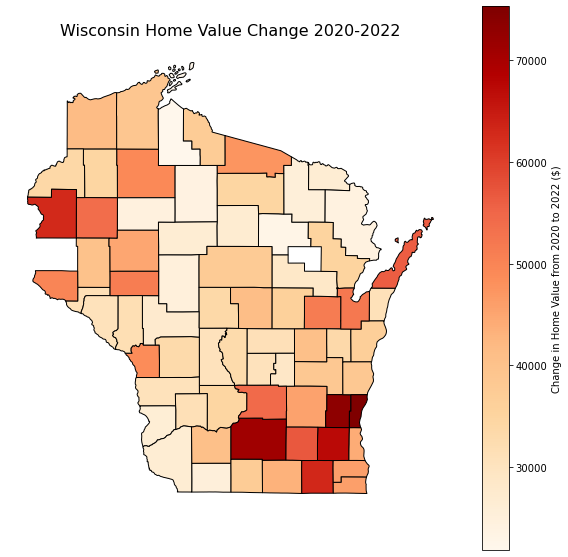

In [176]:
# Wisconsin Home Value Change 2020 - 2022 
# Reference: Maps Lecture
counties = geopandas.read_file('cb_2020_us_county_5m/cb_2020_us_county_5m.shp')
wi_counties = counties[counties['STATEFP']=='55'].copy()
plot_wi_2020 = pd.merge(left=wi_counties, right=home_value_wi_2020, left_on='NAME', right_on='RegionName', how='left', indicator=True)

fig, gax = plt.subplots(figsize=(10,10))


plot_wi_2020.plot(ax=gax, edgecolor='black', column='2020_2022_CHG', legend=True, cmap='OrRd', legend_kwds={'label':'Change in Home Value from 2020 to 2022 ($)'})

gax.set_title('Wisconsin Home Value Change 2020-2022', fontsize = 16)

plt.axis('off')
plt.savefig('chg_wi.svg')
plt.show()

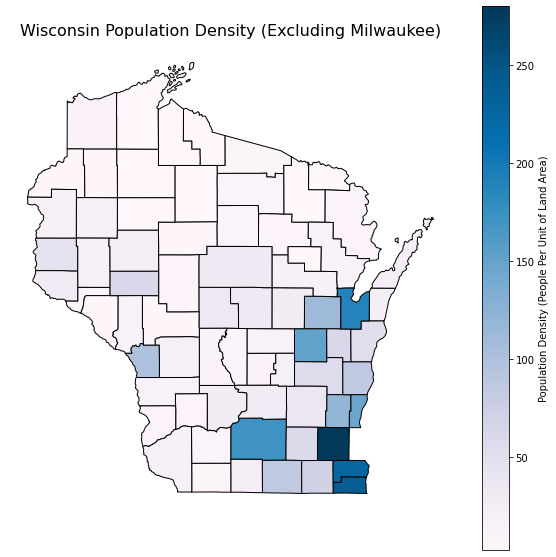

In [177]:
# Wisconsin Pupulation Density
# Reference: Maps Lecture
pop_wi_2022 = pd.merge(left=wi_counties, right=pop_wi, left_on='NAME', right_on='NAME', how='left', indicator=True)
pop_wi_2022 = pop_wi_2022[~pop_wi_2022['NAME'].isin(['Milwaukee'])]

fig, gax = plt.subplots(figsize=(10,10))
pop_wi_2022.plot(ax=gax, edgecolor='black', column='Population_Density', legend=True, cmap='PuBu', legend_kwds={'label':'Population Density (People Per Unit of Land Area)'})

gax.set_title('Wisconsin Population Density (Excluding Milwaukee)', fontsize = 16)

plt.axis('off')
plt.savefig('pop_wi.svg')
plt.show()

## 2.2 Illinois

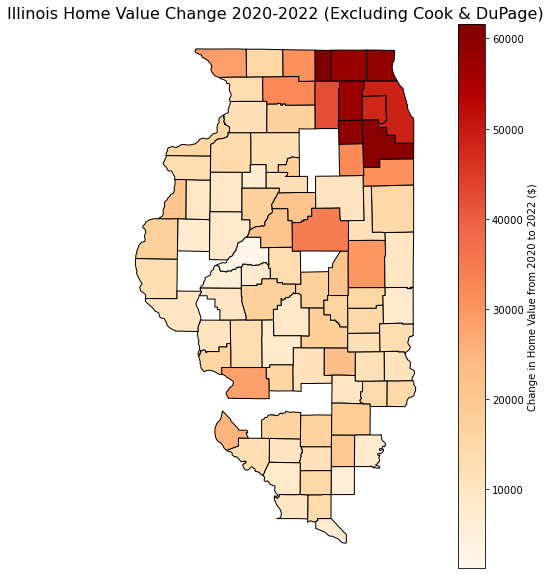

In [178]:
# Illinois Home Value Change 2020 - 2022 
# Reference: Maps Lecture
counties = geopandas.read_file('cb_2020_us_county_5m/cb_2020_us_county_5m.shp')
il_counties = counties[counties['STATEFP']=='17'].copy()
plot_il_2020 = pd.merge(left=il_counties, right=home_value_il_2020, left_on='NAME', right_on='RegionName', how='left', indicator=True)

fig, gax = plt.subplots(figsize=(10,10))


plot_il_2020.plot(ax=gax, edgecolor='black', column='2020_2022_CHG', legend=True, cmap='OrRd', legend_kwds={'label':'Change in Home Value from 2020 to 2022 ($)'})

gax.set_title('Illinois Home Value Change 2020-2022 (Excluding Cook & DuPage)', fontsize = 16)

plt.axis('off')
plt.savefig('chg_il.svg')
plt.show()

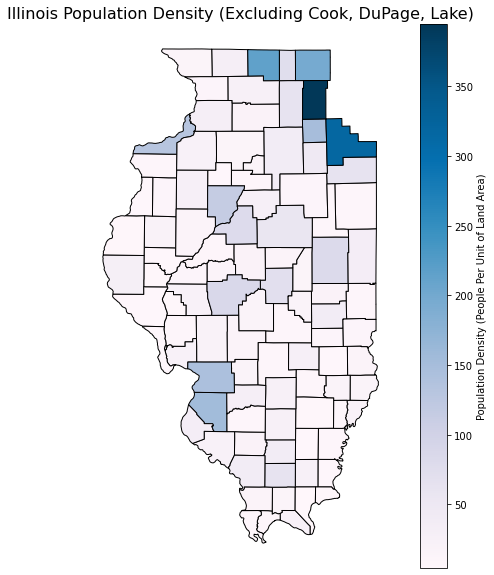

In [179]:
# Wisconsin Pupulation Density
# Reference: Maps Lecture
pop_il_2022 = pd.merge(left=il_counties, right=pop_il, left_on='NAME', right_on='NAME', how='left', indicator=True)
pop_il_2022 = pop_il_2022[~pop_il_2022['NAME'].isin(['Cook', 'DuPage', 'Lake'])]

fig, gax = plt.subplots(figsize=(10,10))
pop_il_2022.plot(ax=gax, edgecolor='black', column='Population_Density', legend=True, cmap='PuBu', legend_kwds={'label':'Population Density (People Per Unit of Land Area)'})

gax.set_title('Illinois Population Density (Excluding Cook, DuPage, Lake)', fontsize = 16)

plt.axis('off')
plt.savefig('pop_il.svg')
plt.show()